ROLL NO: CTAI-009

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
class RandomForestRegressorScratch:
    def __init__(self, n_estimators=10, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, max_features=self.max_features, random_state=i)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

# Train our RF Regressor
rf_reg = RandomForestRegressorScratch(n_estimators=10, max_depth=4, max_features=5)
rf_reg.fit(X_train, y_train)


Mean Squared Error: 2766.5835847301423
R² Score: 0.48750910345214804


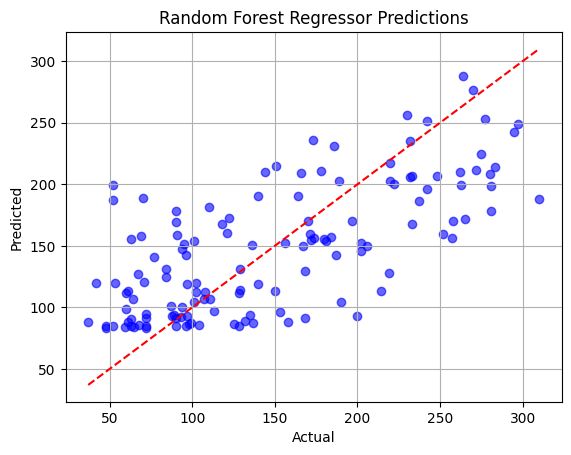

In [6]:
y_pred = rf_reg.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor Predictions')
plt.grid(True)
plt.show()